<h2>Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).</h2>

In [13]:
# import package
import numpy as np
import pandas as pd

In [14]:
# baca data
data = pd.read_csv('../data/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Karena masih ada data yang bersifat kualitatif maka kita mengubahnya kedalam bentuk numerik dengan melakukan encoding terlebih dahulu.


In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [16]:
le = LabelEncoder() # membuat objek dari LabelEncoder
data['sex'] = le.fit_transform(data['sex']) # proses encoding
data['smoker'] = le.fit_transform(data['smoker']) # proses encoding
data['region'] = le.fit_transform(data['region']) # proses encoding

In [17]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Variabel bebas (fitur) umumnya mencakup informasi yang dapat digunakan untuk memprediksi variabel target. Dalam hal ini, variabel bebas terdiri dari age, sex, bmi, children, smoker, dan region. Sedangkan variabel target adalah variabel yang ingin diprediksi atau modelkan, sehingga variabel target dalam kasus ini adalah charges(biaya medis personal).

In [18]:
# Membuat variabel bebas X dan variabel target Y
X = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = data['charges']

<h2>Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.</h2>

Dilakukan pembagian dataset menjadi data latih (training data) dan data uji (testing data) dengan proporsi 70:30 menggunakan modul train_test_split dari scikit-learn (sklearn).

In [19]:
# Pembagian data latih dan data uji dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

Fungsi train_test_split membagi dataset menjadi empat bagian: X_train, X_test, y_train, dan y_test.
* X adalah dataset fitur (variabel bebas).
* y adalah dataset target (variabel target).
* train_size=0.7 mengatur proporsi dataset yang akan digunakan sebagai data latih, dalam hal ini 70% dari dataset.
* test_size=0.3 mengatur proporsi dataset yang akan digunakan sebagai data uji, dalam hal ini 30% dari dataset.

<h2>Membuat multiple linear regression menggunakan Scikit-Learn.</h2>

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [21]:
# Inisialisasi model Linear Regression
model = LinearRegression()

# Melatih model dengan data training
model.fit(X_train, y_train)

LinearRegression()

Pada tahap ini, model regresi linear (objek model) dilatih dengan data latih (X_train sebagai fitur dan y_train sebagai target). Fungsi fit() digunakan untuk melatih model dengan data training. Proses pelatihan ini akan memungkinkan model untuk belajar pola dari data training sehingga dapat digunakan untuk membuat prediksi pada data baru.
* X_train: Merupakan matriks fitur dari data latih.
* y_train: Merupakan vektor target yang sesuai dengan data latih.

<h2>Latih model pada data latih dan lakukan prediksi pada data uji.</h2>

In [22]:
# Melakukan prediksi dengan data testing
y_pred = model.predict(X_test)

Fungsi predict dari model regresi linear (model) digunakan untuk melakukan prediksi menggunakan data uji (X_test). Fungsi ini akan menghasilkan prediksi untuk variabel target berdasarkan fitur-fitur yang diberikan. Nantinya, hasil prediksi disimpan dalam variabel y_pred.

<b>Visualisasi scatter plot</b>

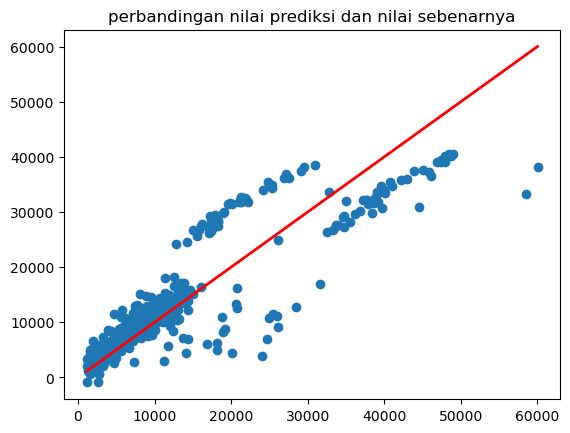

In [23]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.title("perbandingan nilai prediksi dan nilai sebenarnya")

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-', lw=2)

plt.show()

Pada scatter plot diatas, terdapat nilai aktual (y_test) dan nilai prediksi (y_pred) dari model regresi linear. Selain itu, terdapat garis regresi dengan kemiringan 45 derajat untuk memvisualisasikan seberapa baik prediksi model sesuai dengan nilai aktual.

<h2>Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.</h2>

In [24]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Menghitung R-squared (koefisien determinasi)
r2 = r2_score(y_test, y_pred)

# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Menghitung Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Menampilkan hasil evaluasi
print('R-squared (R2):', r2)
print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)

R-squared (R2): 0.7782937842162722
Mean Squared Error (MSE): 32191230.365719203
Mean Absolute Error (MAE): 3935.5642513497314


* R-squared engukur sejauh mana variasi dalam variabel dependen (Y) yang dapat dijelaskan oleh variabel independen (X) dalam model. Semakin tinggi nilainya, semakin baik model dalam menjelaskan variasi dalam data.
* MSE mmengukur rata-rata dari kuadrat selisih antara prediksi model dan nilai sebenarnya. Semakin kecil nilai MSE, semakin baik model dalam memprediksi nilai target.
* MAE mengukur rata-rata dari selisih absolut antara nilai aktual dan nilai prediksi. Semakin rendah nilai MAE, semakin baik model.